Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


Load Dataset

In [2]:
df=pd.read_csv(r"C:\Users\User\Desktop\Projects\Heart Attack.csv")
df

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin,class
0,64,1,66,160,83,160.0,1.80,0.012,negative
1,21,1,94,98,46,296.0,6.75,1.060,positive
2,55,1,64,160,77,270.0,1.99,0.003,negative
3,64,1,70,120,55,270.0,13.87,0.122,positive
4,55,1,64,112,65,300.0,1.08,0.003,negative
...,...,...,...,...,...,...,...,...,...
1314,44,1,94,122,67,204.0,1.63,0.006,negative
1315,66,1,84,125,55,149.0,1.33,0.172,positive
1316,45,1,85,168,104,96.0,1.24,4.250,positive
1317,54,1,58,117,68,443.0,5.80,0.359,positive


Separate Catagorical and Numerical Data

In [3]:
cat=df.select_dtypes(include='object').columns
num=df.select_dtypes(exclude='object').columns

In [4]:
cat

Index(['class'], dtype='object')

In [5]:
num

Index(['age', 'gender', 'impluse', 'pressurehight', 'pressurelow', 'glucose',
       'kcm', 'troponin'],
      dtype='object')

Pre-Processing

In [6]:
df.shape

(1319, 9)

In [7]:
df.head()

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin,class
0,64,1,66,160,83,160.0,1.80,0.012,negative
1,21,1,94,98,46,296.0,6.75,1.060,positive
2,55,1,64,160,77,270.0,1.99,0.003,negative
3,64,1,70,120,55,270.0,13.87,0.122,positive
4,55,1,64,112,65,300.0,1.08,0.003,negative


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            1319 non-null   int64  
 1   gender         1319 non-null   int64  
 2   impluse        1319 non-null   int64  
 3   pressurehight  1319 non-null   int64  
 4   pressurelow    1319 non-null   int64  
 5   glucose        1319 non-null   float64
 6   kcm            1319 non-null   float64
 7   troponin       1319 non-null   float64
 8   class          1319 non-null   object 
dtypes: float64(3), int64(5), object(1)
memory usage: 92.9+ KB


In [9]:
df.describe()

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin
count,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000
mean,56.191812,0.659591,78.336619,127.170584,72.269143,146.634344,15.274306,0.360942
std,13.647315,0.474027,51.630270,26.122720,14.033924,74.923045,46.327083,1.154568
min,14.000000,0.000000,20.000000,42.000000,38.000000,35.000000,0.321000,0.001000
25%,47.000000,0.000000,64.000000,110.000000,62.000000,98.000000,1.655000,0.006000
50%,58.000000,1.000000,74.000000,124.000000,72.000000,116.000000,2.850000,0.014000
75%,65.000000,1.000000,85.000000,143.000000,81.000000,169.500000,5.805000,0.085500
max,103.000000,1.000000,1111.000000,223.000000,154.000000,541.000000,300.000000,10.300000


In [10]:
df.isnull().sum()

age              0
gender           0
impluse          0
pressurehight    0
pressurelow      0
glucose          0
kcm              0
troponin         0
class            0
dtype: int64

In [11]:
df.duplicated().sum()

np.int64(0)

Analuzing Target Variable

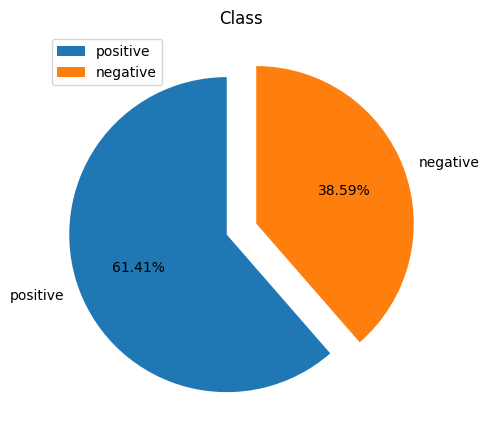

In [ ]:
plt.figure(figsize=(5,10))
keys=df['class'].value_counts().keys()
values=df['class'].value_counts().values
plt.pie(
        x=values,
        explode=[0.1]*len(values),
        labels=keys,
        autopct='%0.2f%%',
        startangle=90
    )
plt.title('Class')
plt.legend()
plt.tight_layout()
plt.show()

NUMERICAL Column Analysis

In [13]:
num

Index(['age', 'gender', 'impluse', 'pressurehight', 'pressurelow', 'glucose',
       'kcm', 'troponin'],
      dtype='object')

In [14]:
df[num].describe()

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin
count,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000
mean,56.191812,0.659591,78.336619,127.170584,72.269143,146.634344,15.274306,0.360942
std,13.647315,0.474027,51.630270,26.122720,14.033924,74.923045,46.327083,1.154568
min,14.000000,0.000000,20.000000,42.000000,38.000000,35.000000,0.321000,0.001000
25%,47.000000,0.000000,64.000000,110.000000,62.000000,98.000000,1.655000,0.006000
50%,58.000000,1.000000,74.000000,124.000000,72.000000,116.000000,2.850000,0.014000
75%,65.000000,1.000000,85.000000,143.000000,81.000000,169.500000,5.805000,0.085500
max,103.000000,1.000000,1111.000000,223.000000,154.000000,541.000000,300.000000,10.300000


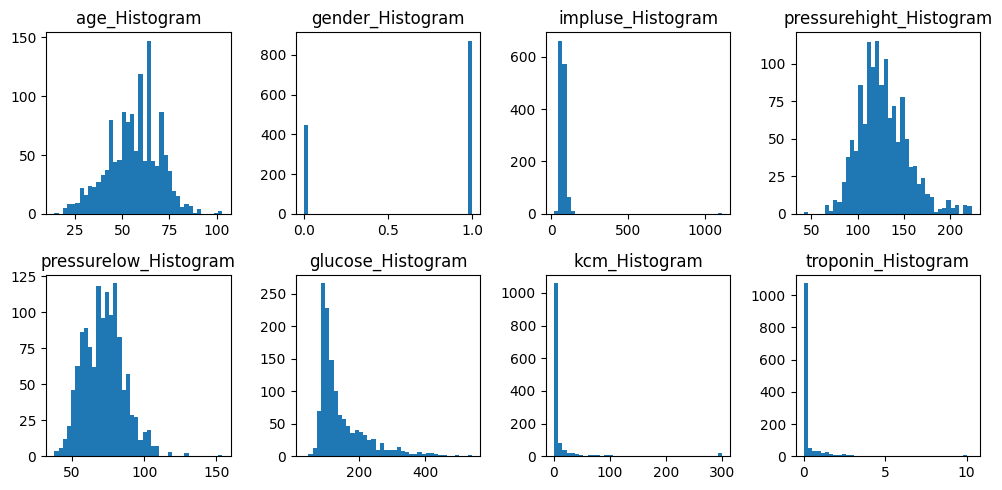

In [15]:
plt.figure(figsize=(10,5))
for col in range(len(num)):
    plt.subplot(2,4,(col+1))
    plt.hist(df[num[col]],bins=40)
    plt.title(f'{num[col]}_Histogram')
plt.tight_layout()
plt.show()

OUTLIERS ANALYSIS

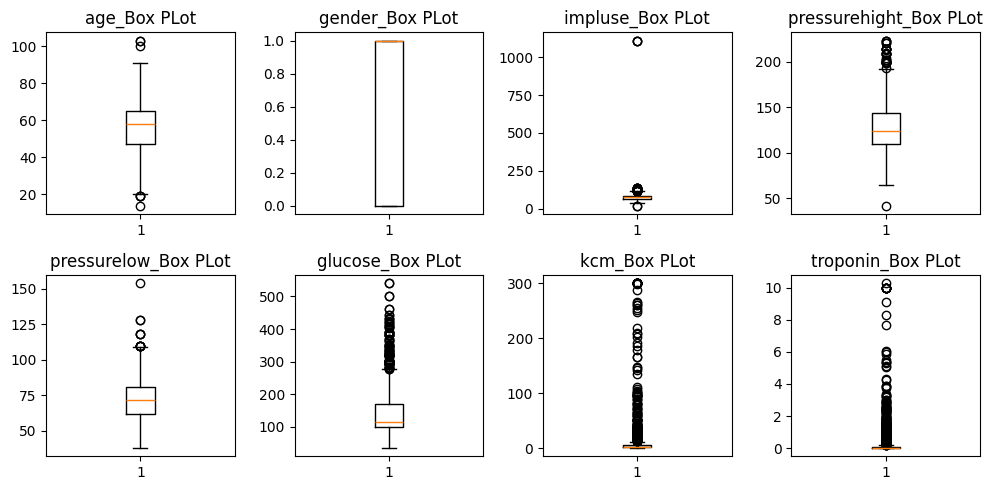

In [16]:
plt.figure(figsize=(10,5))
for col in range(len(num)):
    plt.subplot(2,4,(col+1))
    plt.boxplot(df[num[col]])
    plt.title(f'{num[col]}_Box PLot')
plt.tight_layout()
plt.show()

Handling OUTLIERS

In [17]:
for col in num:
    Q1 = round(np.percentile(df[col], 25), 2)
    Q3 = round(np.percentile(df[col], 75), 2)
    IQR = Q3 - Q1
    lb = Q1 - IQR * 1.5
    ub = Q3 + IQR * 1.5

    con = (df[col] < lb) | (df[col] > ub)

    outlier_df = df[col][con]              
    print(f'{col} -> {len(outlier_df)} Outliers')

age -> 7 Outliers
gender -> 0 Outliers
impluse -> 30 Outliers
pressurehight -> 32 Outliers
pressurelow -> 12 Outliers
glucose -> 92 Outliers
kcm -> 205 Outliers
troponin -> 255 Outliers


In [18]:
for col in num:
    if col!='gender':
        Q1 = round(np.percentile(df[col], 25), 2)
        Q3 = round(np.percentile(df[col], 75), 2)
        IQR = Q3 - Q1
        lb = Q1 -  1.5 * IQR
        ub = Q3 +  1.5 * IQR
        df[col]=df[col].clip(lower=lb,upper=ub)

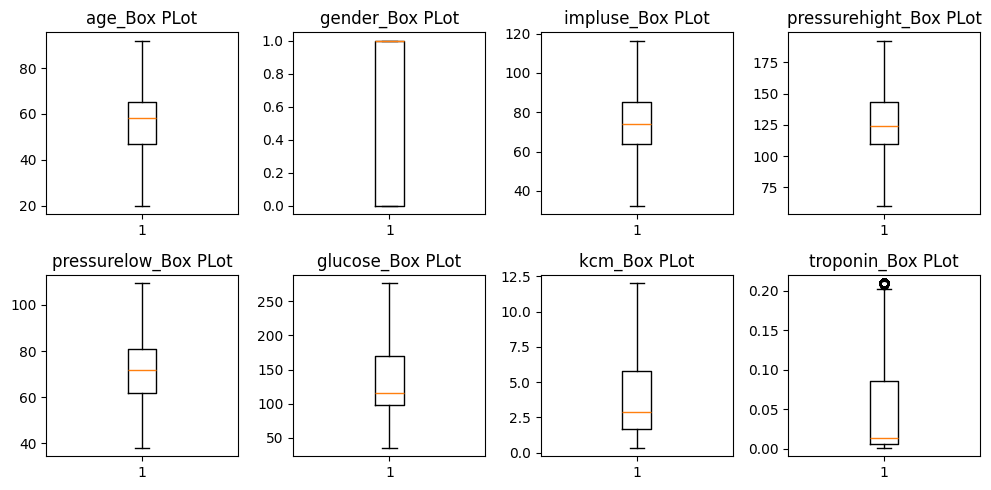

In [19]:
plt.figure(figsize=(10,5))
for col in range(len(num)):
    plt.subplot(2,4,(col+1))
    plt.boxplot(df[num[col]])
    plt.title(f'{num[col]}_Box PLot')
plt.tight_layout()
plt.show()

Columns VS Target 

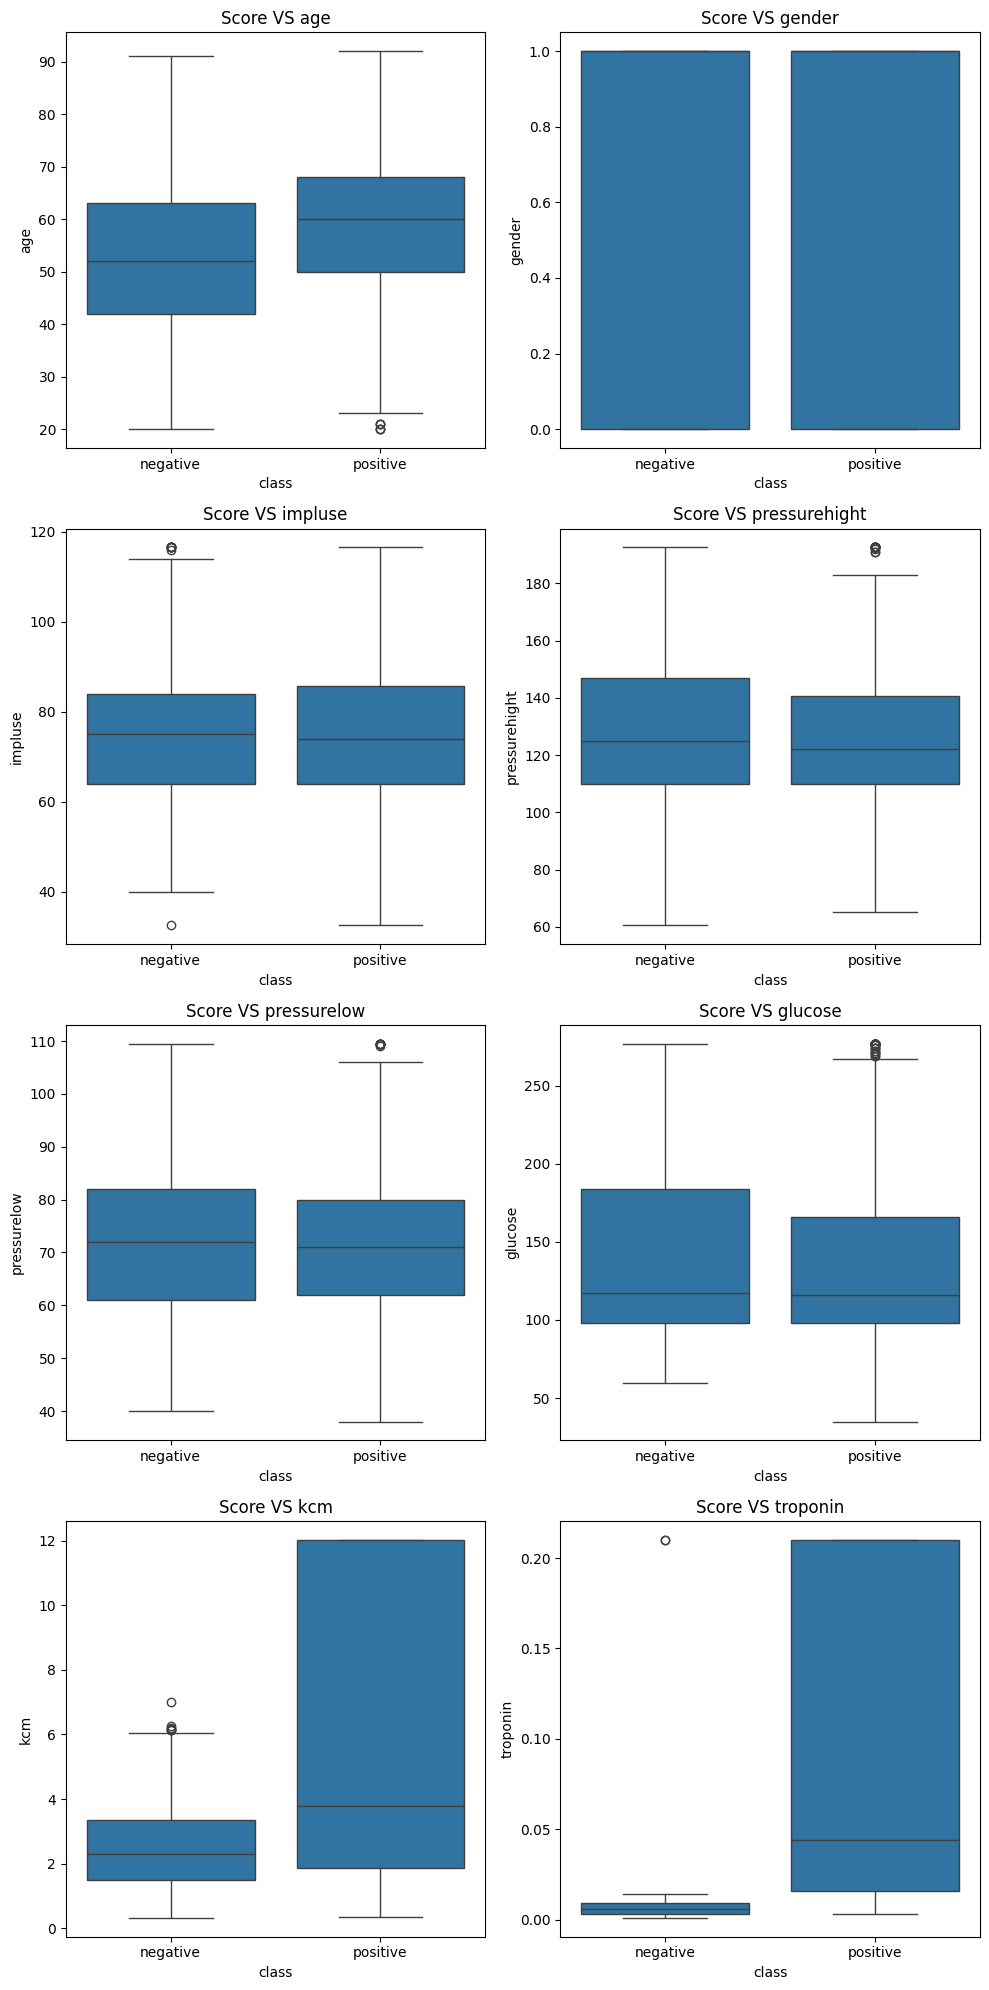

In [20]:
plt.figure(figsize=(10,20))
for col in range(len(num)):
    plt.subplot(4,2,(col+1))
    sns.boxplot(x='class',y=num[col],data=df)
    plt.title(f'Score VS {num[col]}')
plt.tight_layout()
plt.show()

Correlation Matrix

In [21]:
corr_matrix=df[num].corr()*100
print(corr_matrix)

                      age      gender     impluse  pressurehight  pressurelow  \
age            100.000000   -9.266558   -0.333917       1.570399     0.148702   
gender          -9.266558  100.000000    0.593027       1.407276    -0.852105   
impluse         -0.333917    0.593027  100.000000      -4.018069    13.141282   
pressurehight    1.570399    1.407276   -4.018069     100.000000    59.798956   
pressurelow      0.148702   -0.852105   13.141282      59.798956   100.000000   
glucose         -1.520898    0.307285    0.493355       1.753128    -1.272921   
kcm             -2.666376    1.692986   -0.144634      -3.780859    -4.103206   
troponin        16.771854   14.356281    1.830393       3.766648     3.538690   

                  glucose         kcm    troponin  
age             -1.520898   -2.666376   16.771854  
gender           0.307285    1.692986   14.356281  
impluse          0.493355   -0.144634    1.830393  
pressurehight    1.753128   -3.780859    3.766648  
pressurelo

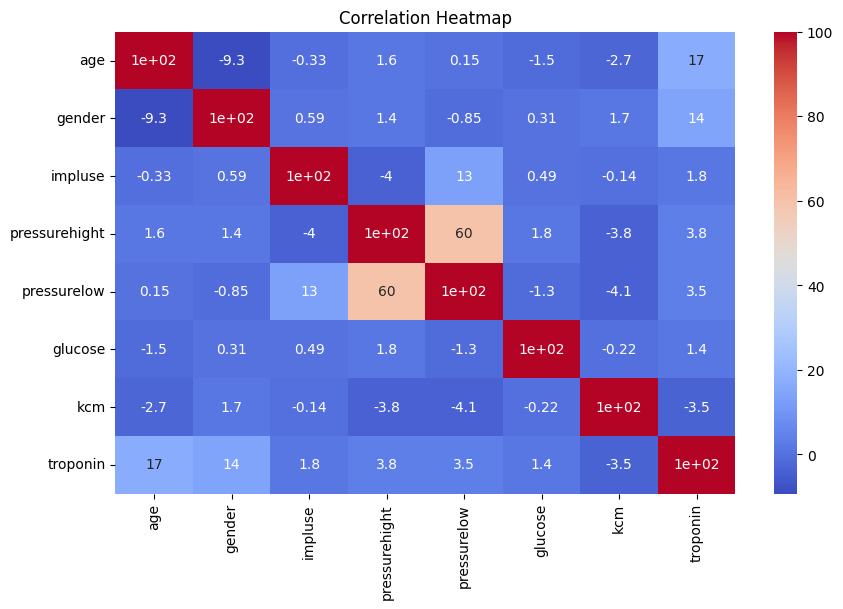

In [22]:
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

Analyzing RelationShip between Corelated Variables

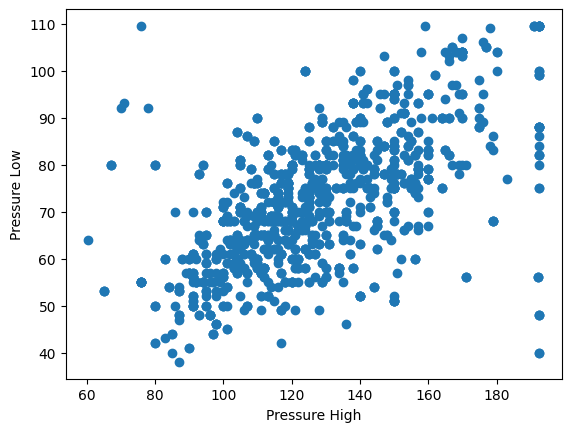

In [23]:
plt.scatter(df['pressurehight'],df['pressurelow'])
plt.xlabel("Pressure High")
plt.ylabel("Pressure Low")
plt.show()

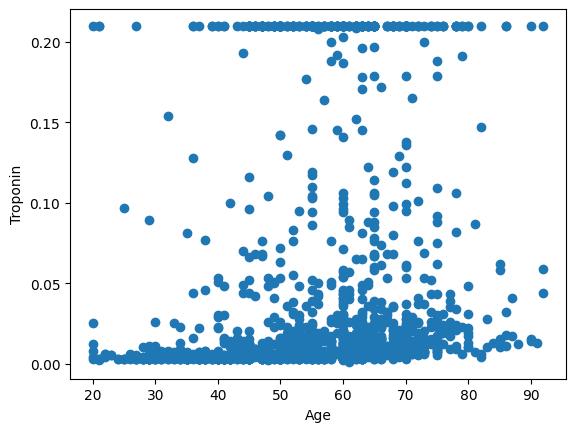

In [24]:
plt.scatter(df['age'],df['troponin'])
plt.xlabel("Age")
plt.ylabel("Troponin")
plt.show()

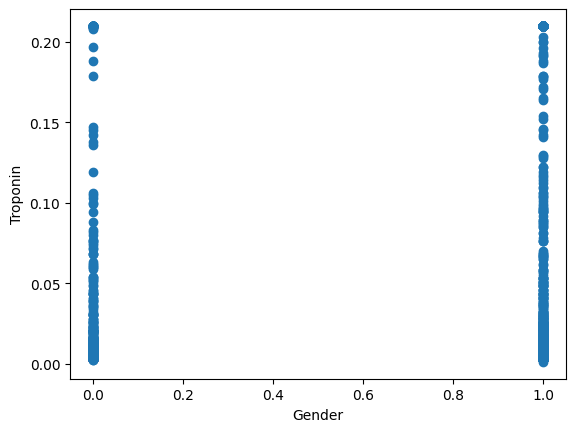

In [25]:
plt.scatter(df['gender'],df['troponin'])
plt.xlabel("Gender")
plt.ylabel("Troponin")
plt.show()

Label Encoding in order to adjust Catagorical data

In [26]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['class']=le.fit_transform(df['class'])

In [27]:
df.head()

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin,class
0,64,1,66.0,160.0,83.0,160.00,1.800,0.012,0
1,21,1,94.0,98.0,46.0,276.75,6.750,0.210,1
2,55,1,64.0,160.0,77.0,270.00,1.990,0.003,0
3,64,1,70.0,120.0,55.0,270.00,12.025,0.122,1
4,55,1,64.0,112.0,65.0,276.75,1.080,0.003,0


Model selection and Deployment

In [28]:
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,classification_report,roc_auc_score,roc_curve,auc
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
x1=df.drop(['class'],axis=1)
y1=df['class']
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.2,random_state=42)

In [29]:
print("X_Train Shape",x_train.shape)
print("Y_Train Shape",y_train.shape)
print("X_Test Shape",x_test.shape)
print("Y_Test Shape",y_test.shape)

X_Train Shape (1055, 8)
Y_Train Shape (1055,)
X_Test Shape (264, 8)
Y_Test Shape (264,)


Normalization

In [30]:
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()
x_train=scalar.fit_transform(x_train)
x_test=scalar.fit_transform(x_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

In [32]:
lr_param = {
        'penalty': ['l1', 'l2'],
        'C': [0.01, 0.1, 1, 10, 100],
        'solver': ['liblinear', 'saga'],
    }
lr=LogisticRegression(random_state=42,max_iter=5000)
lr_grid=GridSearchCV(lr,lr_param,scoring='accuracy',cv=5,verbose=True)
lr_grid=lr_grid.fit(x_train,y_train)
lr_best=lr_grid.best_estimator_

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [35]:
rf_param = {        
       'n_estimators': [100, 200],       
        'max_depth': [None, 5, 10, 20],      
        'min_samples_split': [2, 5, 10]
 }
rf=RandomForestClassifier(random_state=42)
rf_grid=GridSearchCV(rf,rf_param,scoring='accuracy',cv=5,n_jobs=-1)
rf_grid=rf_grid.fit(x_train,y_train)
rf_best=rf_grid.best_estimator_

In [38]:
nb_param = {
        'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1]
    }
nb=GaussianNB()
nb_grid=GridSearchCV(nb,nb_param,scoring='accuracy',cv=5,n_jobs=-1)
nb_grid=nb_grid.fit(x_train,y_train)
nb_best=nb_grid.best_estimator_

In [44]:
models={
    LogisticRegression: lr,
    RandomForestClassifier:rf,
    GaussianNB:nb
}
for name,model in models.items():
    model.fit(x_train, y_train)
    y_prd=model.predict(x_test)
    print(f'{name} Classification Report')
    print(model.score(x_test,y_test))
    print(classification_report(y_test,y_prd))
    

<class 'sklearn.linear_model._logistic.LogisticRegression'> Classification Report
0.8901515151515151
              precision    recall  f1-score   support

           0       0.85      0.87      0.86       101
           1       0.92      0.90      0.91       163

    accuracy                           0.89       264
   macro avg       0.88      0.89      0.88       264
weighted avg       0.89      0.89      0.89       264

<class 'sklearn.ensemble._forest.RandomForestClassifier'> Classification Report
0.9848484848484849
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       101
           1       0.99      0.99      0.99       163

    accuracy                           0.98       264
   macro avg       0.98      0.98      0.98       264
weighted avg       0.98      0.98      0.98       264

<class 'sklearn.naive_bayes.GaussianNB'> Classification Report
0.875
              precision    recall  f1-score   support

           0       0.7